In [9]:
import glob
import pandas as pd

In [10]:
csvs = glob.glob('*/output.csv')
print(csvs)
df_results = [ pd.read_csv(csv) for csv in csvs ]

['AnalyticModel\\output.csv', 'NumericalModel\\output.csv']


In [11]:
df_r = pd.DataFrame({
    "Name" : df_results[0]["Name"],
    "E [GPa]" : df_results[0]["E [GPa]"],
    "E pred Analytic [GPa]" : df_results[0]["E pred [GPa]"],
    "E pred Numeric [GPa]" : df_results[1]["E pred [GPa]"],
})

df_r

,Name,E [GPa],E pred Analytic [GPa],E pred Numeric [GPa]
0,TFP1-1,13.201050,13.620581,13.866182
1,TFP2-1,9.869501,9.721223,10.011739
2,TFP3-1,9.222003,8.711639,8.991418
3,TFP4-1,10.181815,8.778776,9.061292
4,TFP5-1,6.143105,7.514863,7.602355
5,TFP6-1,7.798060,8.068490,8.143301


In [12]:
df_r["E pred Analytic [GPa]"]/df_r["E pred Numeric [GPa]"]

0    0.982288
1    0.970982
2    0.968884
3    0.968822
4    0.988491
5    0.990813
dtype: float64

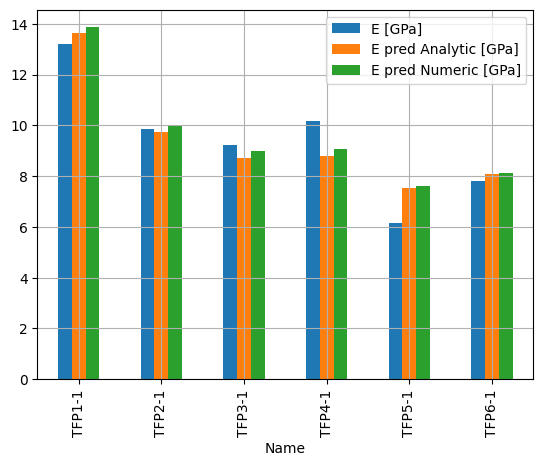

In [13]:
# bar plot of the results

import matplotlib.pyplot as plt

df_r.plot(x="Name", y=["E [GPa]", 
                       "E pred Analytic [GPa]", 
                       "E pred Numeric [GPa]"], kind="bar")
plt.grid( )

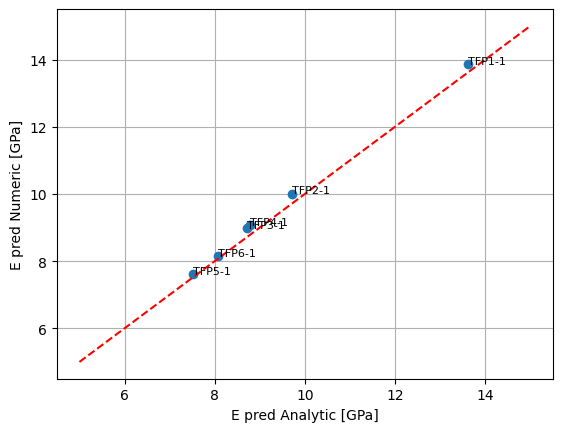

In [14]:
plt.plot(df_r["E pred Analytic [GPa]"],
         df_r["E pred Numeric [GPa]"],'o')
plt.plot([5,15],[5,15],'r--')
plt.xlabel("E pred Analytic [GPa]")
plt.ylabel("E pred Numeric [GPa]")
# text name 
for i in range(len(df_r)):
    plt.text(df_r["E pred Analytic [GPa]"][i],
             df_r["E pred Numeric [GPa]"][i],df_r["Name"][i],
                fontsize=8)
plt.grid()

<Axes: xlabel='Name'>

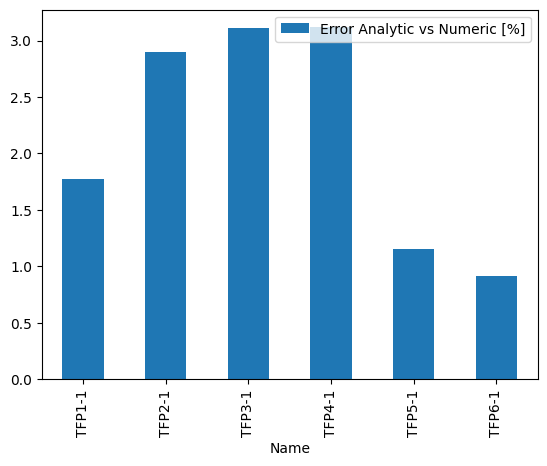

In [15]:
# error relative Analytic vs Numeric

df_r["Error Analytic vs Numeric [%]"] = 100 * abs(df_r["E pred Numeric [GPa]"] - df_r["E pred Analytic [GPa]"]) / df_r["E pred Numeric [GPa]"]
df_r["Error Analytic [%]"] = 100 * abs(df_r["E [GPa]"] - df_r["E pred Analytic [GPa]"]) / df_r["E [GPa]"]
df_r["Error Numeric [%]"] = 100 * abs(df_r["E [GPa]"] - df_r["E pred Numeric [GPa]"]) / df_r["E [GPa]"]
# error plot 
df_r.plot(x="Name", y="Error Analytic vs Numeric [%]", kind="bar")

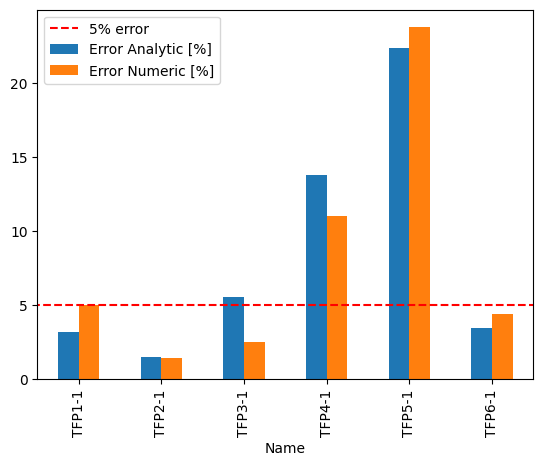

In [20]:
df_r.plot(x="Name", y=["Error Analytic [%]", "Error Numeric [%]"], kind="bar")
# 5 % horizontal line
plt.hlines(5, -1, 10, colors='r', linestyles='dashed',label="5% error")
plt.legend()